# DATA SCIENCE FINAL EXAM 2019/2020 REWORK 

---



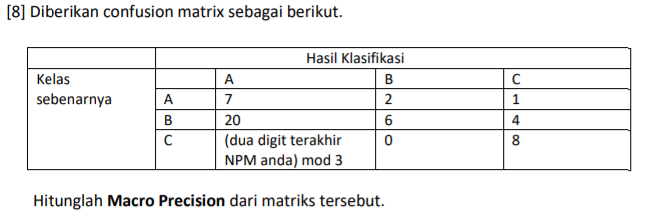

> Answer: Macro-precision measures the average precision per class. <br> Precision = TP/TP+FP or the portion of positive predicions that were actually correct. 

In [ ]:
A = 7/(7+20+(44%3))
B = 6/(2+6)
C = 8/(1+4+8)

In [ ]:
# Macro Precision Score
MP = (A+B+C)/3
MP

0.5355879752431477

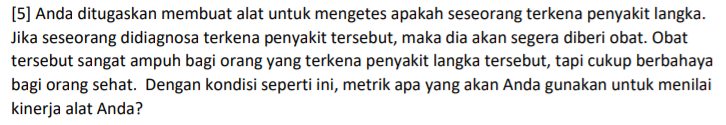

> Answer: The best metric to use when you want to avoid false positive as describe by the case above is precision. Precision focuses on maximixing TP while minimizing FP.

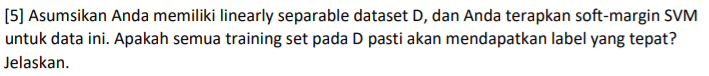

> Answer: soft-margin is better at training linearly separable and non-linearly separable dataset because it is not sensitive to outliers. Thus, it is very likely for misclassified outliers to exists even just a little. Therefore, we cannot guarantee all data will be classified to the correct class.
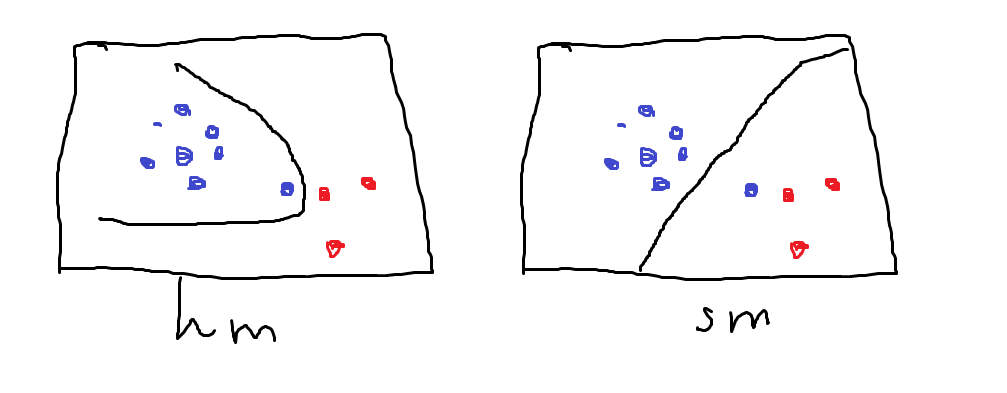

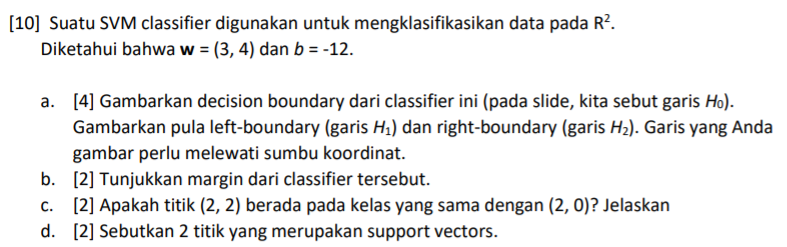

> Answers:  
* H0 = 3x1+4x2-12 = 0
* H1 = 3x1+4x2-13=0
* H2 = 3x1+4x2-11=0

> <img width="450" src="https://i.ibb.co/8xZJxSb/Screenshot-2021-06-14-090304.jpg" >

> The margin is perpendicular line that connects blue and green lines. Point(2,2) is located on class 1(right-side), point(2,0) is on the class -1(left-side). support vectors points are points that are located within the support vectors lines. One example for each line are: (0,13/4) and (0,11/4)

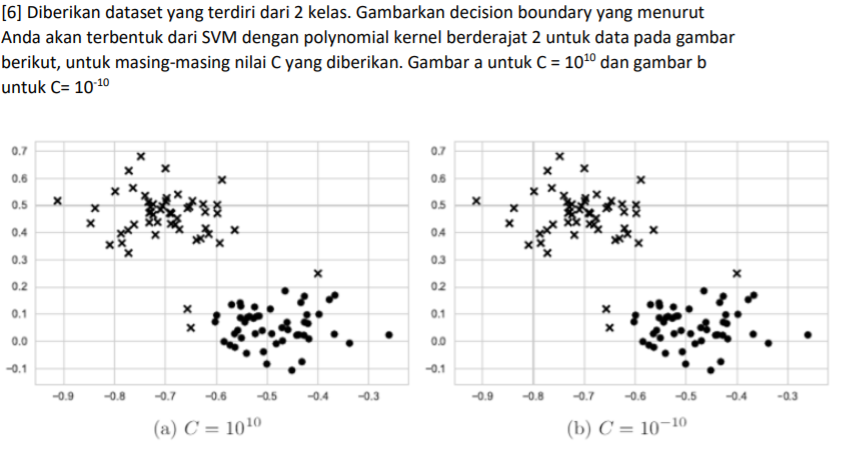

> 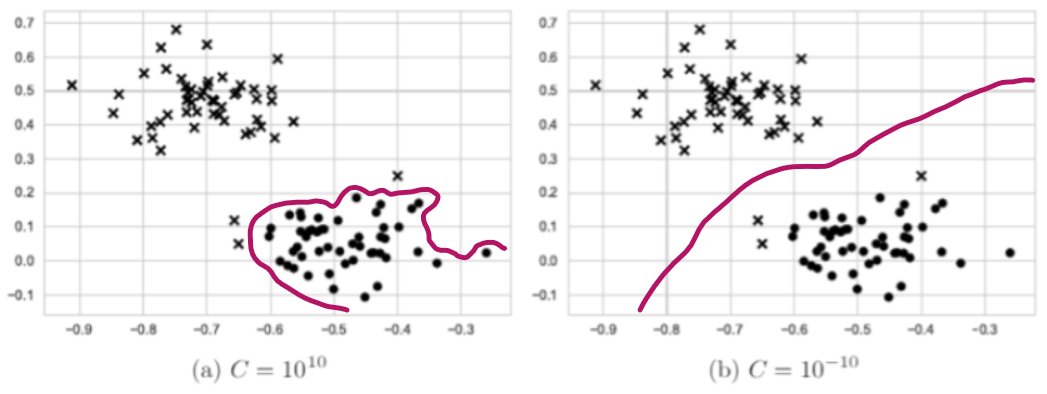

> Answer: C is regularization parameter. The higher the C, the lesser the margin. In other words, the smaller the error terms. Therefore, in the right-side visualization above, the line tries to separate x from o as much as possible, resulting in an overfitting. Trade-offs between the decision boundary and error term must be thoughfully decided.

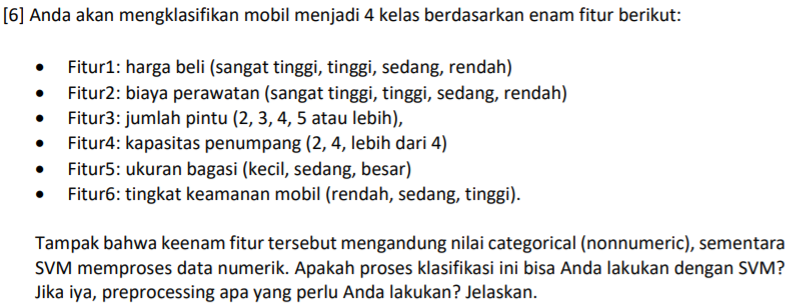

> Answer: The above data can be fed into SVM. Pre-processing steps involves categorical data encoding into numerical ones. That can be achieved by label-encoding or one-hot encoding. 

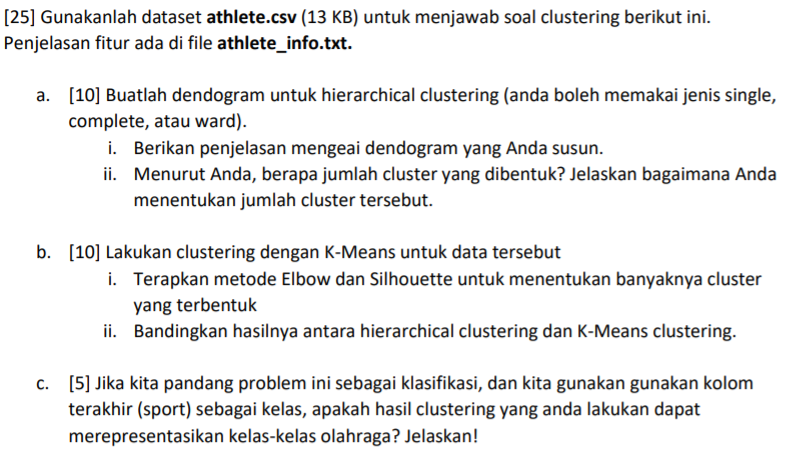

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans  
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize

In [ ]:
# Please adjust your file location
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/My Drive/DSA/UAS

/content/drive/My Drive/DSA/UAS


In [ ]:
!ls

preparation-final-exam.ipynb  soal_regresi.ipynb


In [ ]:
df = pd.read_csv('athlete.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


In [ ]:
df.sport.value_counts()

Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: sport, dtype: int64

In [ ]:
# zero for female, 1 for male
df.sex = df.sex.astype('category').cat.codes

In [ ]:
df.sport = df.sport.astype('category').cat.codes

In [ ]:
df.sport.value_counts()

4    37
6    29
0    25
3    23
5    22
1    19
9    17
7    15
8    11
2     4
Name: sport, dtype: int64

In [ ]:
df.describe()

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108911,43.091584,14.566337,76.876238,22.955891,69.021782,13.507426,64.873713,180.103960,75.007921,0.504950,4.326733
std,0.457976,1.800337,3.662989,1.362451,47.501239,2.863933,32.565333,6.189826,13.070197,9.734494,13.925199,0.501218,2.697369
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,5.630000,34.360000,148.900000,37.800000,0.000000,0.000000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,8.545000,54.667500,174.000000,66.525000,0.000000,3.000000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,11.650000,63.035000,179.700000,74.400000,1.000000,4.000000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,18.080000,74.750000,186.175000,84.125000,1.000000,6.000000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,35.520000,106.000000,209.400000,123.200000,1.000000,9.000000


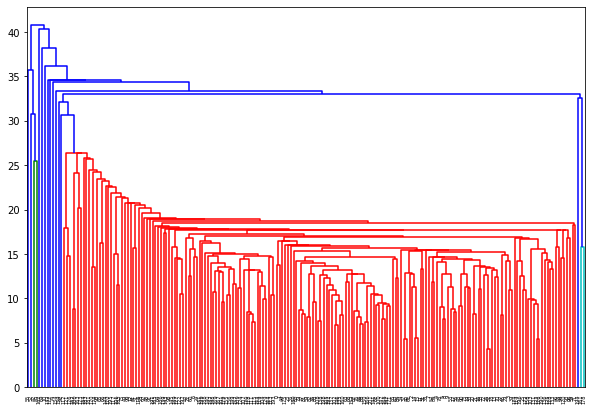

In [ ]:
linked = linkage(df, 'single')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

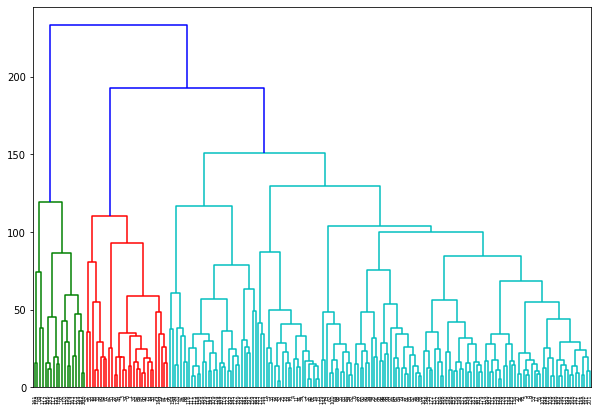

In [ ]:
linked = linkage(df, 'complete')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

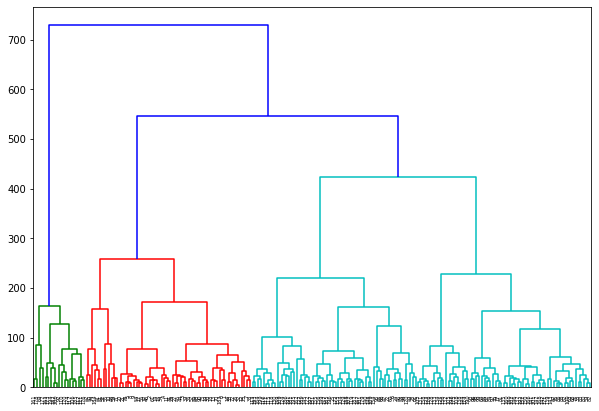

In [ ]:
linked = linkage(df, 'ward')

plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.show()

> Answer: Dendogram helps to visualize hierarchical cluster results which calculate the similarity between one data/cluter to other data/cluster. I pick the complete and ward dendogram since they formed clearer separations between data.
<br> Complete and ward dendogram suggest 3 clusters within our data as can be seen through the color separation. In the image below I drew a straight line that inidcates where the 3 clusters came from, it came from cutting the dendogram on the purple line. It is justifiable as the height of the those lines that connect each cluster were wide, however by discarding the proposed clusters, I analyzed that it is actually make sense to cut the gram in the orange line which resulted in 4 clusters intead of 3. Thus, the ideal clusters would either be 3 or 4.

> 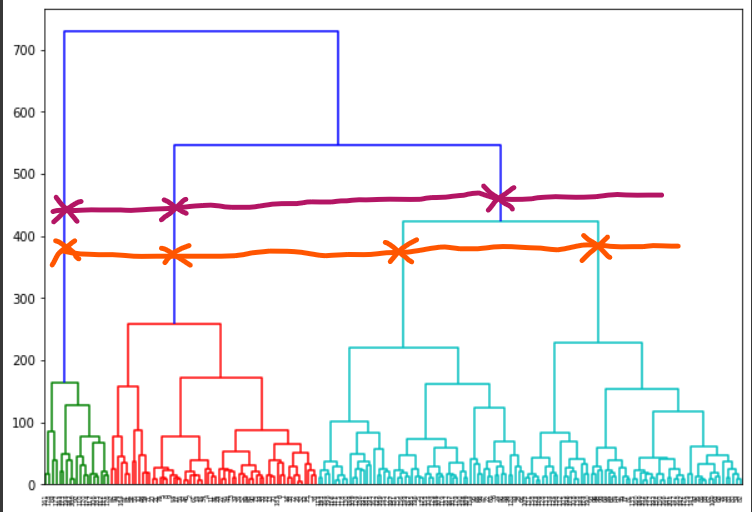

In [ ]:
clusters = [2,3,4,5,6,7]

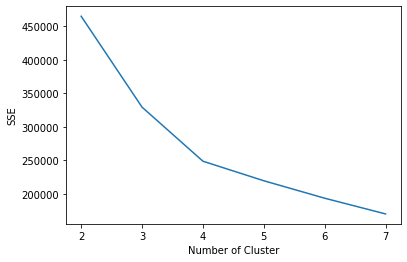

In [ ]:
sse = {} # sum of squared error dictionary
cluster_centers = {}  # cluster point dictionary

for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(df) # latih kmeans untuk setiap k
    df["clusters"+ str(k)] = kmeans.labels_ # catat hasil clustering untuk setiap data
    cluster_centers[str(k)] = kmeans.cluster_centers_ # catat posisi cluster center untuk setiap k
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.show()

In [ ]:
# Checking the K-mean s clustering method. It produces a similar result.
silhoutte_score = []
for n in clusters:
    clusterer = KMeans(n_clusters=n)
    preds = clusterer.fit_predict(df)
    #centers = clusterer.cluster_centers_
    score = silhouette_score(df, preds)
    silhoutte_score.append(score)
    print("For n_clusters = {}, silhouette score is {})".format(n, score))

For n_clusters = 2, silhouette score is 0.38901359327170953)
For n_clusters = 3, silhouette score is 0.34141121167655747)
For n_clusters = 4, silhouette score is 0.3312017326889632)
For n_clusters = 5, silhouette score is 0.28831588819024995)
For n_clusters = 6, silhouette score is 0.27649513283512606)
For n_clusters = 7, silhouette score is 0.2830793909592755)


> Answer: Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. 1 is the best possible value. Thus, cluster = 2 gives the best silhouette score. 
> <br><br>Elbow method is used to decide the best amount of clusters by following 'the law of deminishing returns'. The intuition is that the more clusters the lower the SSE because each cluster tends to have homogenous data points. However, this could be the sign of overfitting. Therefore, we shall pick the amount of cluster in the elbow part that has a decent SSE yet not overfit ( or too much clusters than it should be ). From best clusters based on this method is 4.
<br><br> Hence by averaging the result from both metrics, I pick clusters = 3. The average cluster from K-means clustering is similar with the result from hierarchical clustering. 

In [ ]:
df.sport.value_counts()

4    37
6    29
0    25
3    23
5    22
1    19
9    17
7    15
8    11
2     4
Name: sport, dtype: int64

> Answer: For the last question, if sport column is our target variable in a classification problem, then clustering result don't match the amount of classes exist. Classification problem need to be solved with a different approach.